In [182]:
import pandas as pd
import numpy as np
import re, string
import matplotlib.pyplot as plt
import lyricsgenius as genius

In [172]:
df = pd.read_csv('full.csv',index_col='Unnamed: 0')

In [173]:
print('Dataset shape', df.shape)
df.info()


Dataset shape (20758, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 9 columns):
abstract     20411 non-null object
album        20755 non-null object
artist       20757 non-null object
full text    20753 non-null object
genre        18456 non-null object
link         20758 non-null object
published    20758 non-null object
score        20758 non-null float64
year         20689 non-null object
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [174]:
#year column
#range, special characters
#remove anything thats not a number or a /
nochar = re.compile(r'[^\d//]+')
df.year = df.year.astype(str).apply(lambda x: nochar.sub('', x))


In [175]:
# ____ / ____ second date is publish year
print(df.iloc[20021])

def dateSplit(x):
    if '/' in x:
        temp = x.split('/')
        x = temp[0]
    if x == '':
        x = 1900
    return x

# if date contains /, split and use [0]

# /reviews/albums/2290-1s/ - no date because greatest hits album

abstract     "How about not hitting it, but kind of doing i...
album                                         Everything Is EP
artist                                      Neutral Milk Hotel
full text    "How about not hitting it, but kind of doing i...
genre                                                     Rock
link                    /reviews/albums/5759-everything-is-ep/
published                                  2001-10-03T05:00:02
score                                                        6
year                                                 1995/2001
Name: 20021, dtype: object


In [176]:
df.year = df.year.apply(dateSplit)
df.year = df.year.astype(int)


In [177]:
print("Missing reviews", df['full text'].isna().sum())
#drop rows missing reviews
df = df[df['full text'].notnull()]
df = df[df['artist'].notnull()]
df = df[df['album'].notnull()]

Missing reviews 5


(0, 9)


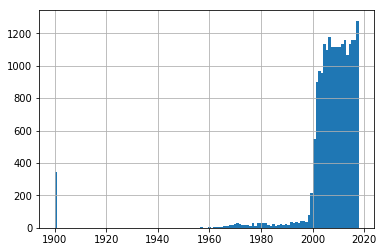

In [181]:
df.year.hist(bins=119)
# num of values missing year
# missing years - throwbacks
print(df[df.year==0].shape)



In [179]:
#df[df.year!=0][4000:5000]
years = df.year.unique()
years.sort()
print(years)

[1900 1957 1959 1960 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [ ]:
api = genius.Genius('')